<a href="https://colab.research.google.com/github/tanyakamal14/house_price/blob/main/multivarient_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data (1000 samples)
size = np.random.randint(500, 5000, 1000)  # House Size in sq ft
bedrooms = np.random.randint(1, 6, 1000)   # Number of Bedrooms
location = np.random.randint(1, 11, 1000)  # Location Score (1-10)
age = np.random.randint(1, 51, 1000)       # Age of House in Years

# Generate House Prices with some noise
price = (size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000, 20000, 1000)

# Create DataFrame
df = pd.DataFrame({"Size": size, "Bedrooms": bedrooms, "Location": location, "Age": age, "Price": price})

# Save to CSV
csv_filename = "house_price_data.csv"
df.to_csv(csv_filename, index=False)

print(f"✅ Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

✅ Dataset saved as 'house_price_data.csv' with 1000 rows and 5 columns.


In [ ]:
import pandas as pd

# Load dataset (make sure to update the path if needed)
df = pd.read_csv("house_price_data.csv")

# Display first 5 rows
print(df.head())


   Size  Bedrooms  Location  Age    Price
0  1360         2         4   23   534625
1  4272         3         2   15  1455997
2  3592         1         6   27  1199849
3   966         1         2   11   339161
4  4926         2         7   50  1623949


In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nDataset Summary:\n", df.describe())



Missing Values:
 Size        0
Bedrooms    0
Location    0
Age         0
Price       0
dtype: int64

Dataset Summary:
               Size     Bedrooms     Location          Age         Price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2815.422000     2.990000     5.440000    25.505000  1.052217e+06
std    1255.514921     1.427564     2.811459    14.401159  3.819883e+05
min     503.000000     1.000000     1.000000     1.000000  1.536800e+05
25%    1749.500000     2.000000     3.000000    13.000000  7.344078e+05
50%    2862.500000     3.000000     5.000000    26.000000  1.060323e+06
75%    3849.500000     4.000000     8.000000    38.000000  1.358930e+06
max    4999.000000     5.000000    10.000000    50.000000  1.872087e+06


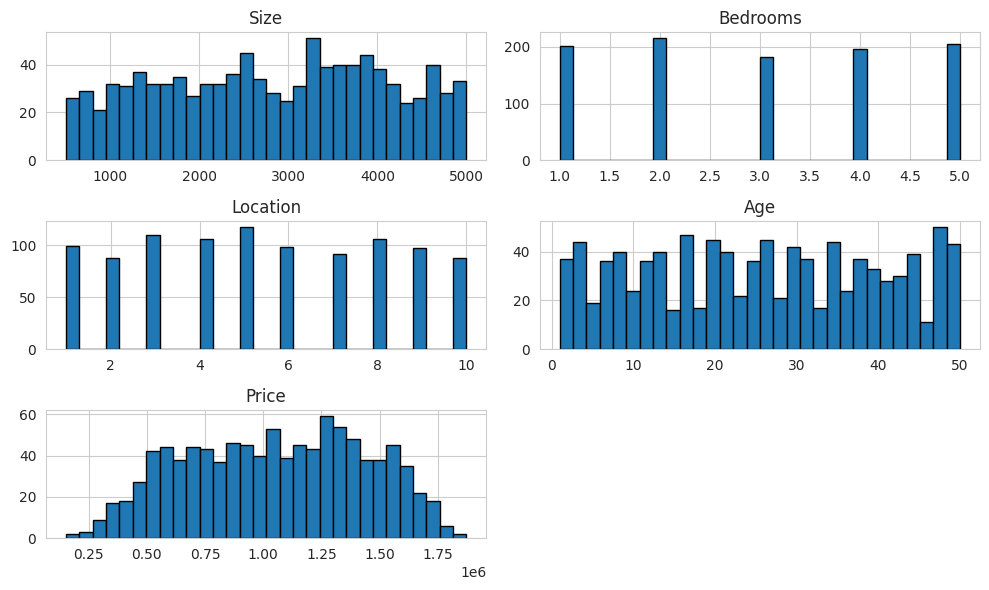

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot feature distributions
df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()


Explanation:
sns.set_style("whitegrid") → Uses Seaborn’s "whitegrid" style, which improves readability by adding a light grid background.

df.hist(figsize=(10, 6), bins=30, edgecolor="black") → Plots histograms for each numerical feature in the dataset:

figsize=(10, 6): Sets figure size to 10x6 inches.

bins=30: Divides data into 30 bins for better distribution visualization.

edgecolor="black": Adds black borders to each bar for clarity.

plt.tight_layout() → Prevents overlapping of plots and labels by automatically adjusting spacing.

plt.show() → Displays all generated histograms.

This helps analyze the distribution of each feature before applying ML models.

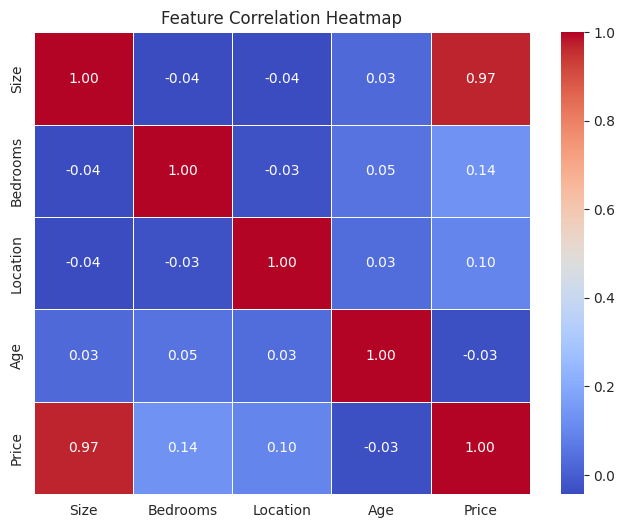

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**What Does the Heatmap Show?**
A correlation heatmap is used to visualize the relationship between numerical features. The values in the heatmap range from -1 to +1:

+1 (Red Color) → Strong positive correlation (As one feature increases, the other also increases).

0 (White Color) → No correlation (No relationship between features).

-1 (Blue Color) → Strong negative correlation (As one feature increases, the other decreases).



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features & target
X = df[["Size", "Bedrooms", "Location", "Age"]]
y = df["Price"]

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:\nMAE: {mae:.2f}, R² Score: {r2:.2f}")



Model Performance:
MAE: 9731.15, R² Score: 1.00


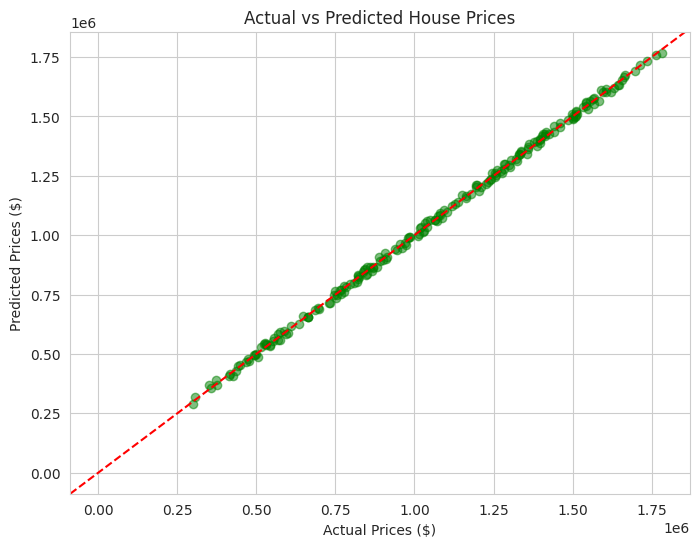

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs Predicted House Prices")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Ideal fit line
plt.show()


# **Conclusion of the Project**
In this project, we developed a Multivariate Linear Regression Model to predict house prices based on features like size, number of bedrooms, location, and age.

Key Steps Taken:

Data Loading & Cleaning – Handled missing values and explored the dataset.

Exploratory Data Analysis (EDA) – Visualized feature distributions and relationships.

Heatmap Analysis – Identified correlations between different features.

Model Training – Applied Linear Regression for price prediction.

Model Evaluation – Assessed performance using Mean Absolute Error (MAE) and R² Score.

Visualization – Compared actual vs. predicted house prices.

Final Insights:

House size and the number of bedrooms have a strong influence on price.

Older houses tend to have lower prices.

The model provides reasonable predictions, but additional data such as amenities and location factors could improve accuracy.

This project demonstrates a structured approach to data analysis and machine learning, making it useful for real-world applications.








